

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

## Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv('analise_exp.csv')

In [3]:
# Shape
df.shape

(9700, 11)

In [4]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
# Verificando se há valores divergentes na coluna Categoria
df['Categoria'].value_counts()

Categoria
Office Supplies    5851
Furniture          2055
Technology         1794
Name: count, dtype: int64

In [13]:
# Selecionando somente a categoira office supplies
df_supplies = df[df['Categoria'] == 'Office Supplies']

# Agrupando as cidades e somando os valores de venda
valor_cidades = df_supplies.groupby('Cidade')['Valor_Venda'].sum()

#Resposta
print(f'{valor_cidades.idxmax()} é a cidade com maior valor de venda de produtos da categoria Office Supplies totalizando ${valor_cidades.max()}')

New York City é a cidade com maior valor de venda de produtos da categoria Office Supplies totalizando $68362.814


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [14]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')

df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [15]:
# Agrupamento da soma de valor de venda por Data
vendas_data = df.groupby('Data_Pedido')['Valor_Venda'].sum()

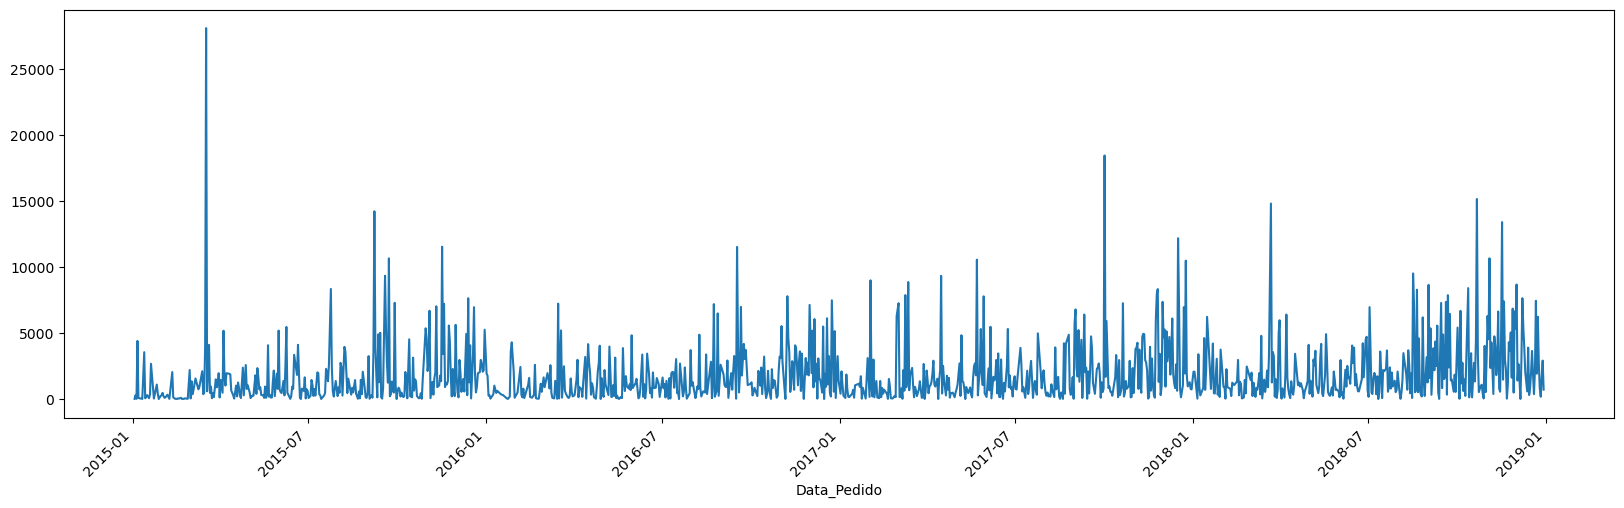

In [16]:

# plotando o gráfico de barras
plt.figure(figsize=(20,6))
vendas_data.plot()
plt.xticks(rotation=45)
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

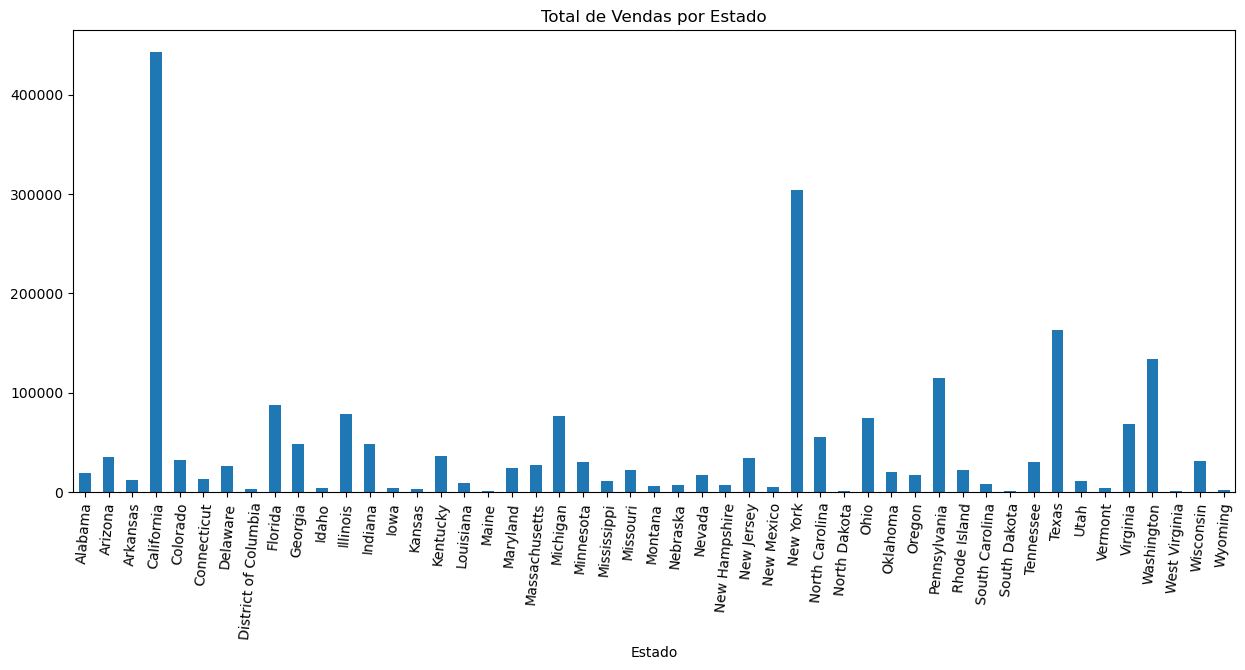

In [17]:
vendas_estado = df.groupby('Estado')['Valor_Venda'].sum()

fig, ax = plt.subplots(figsize=(15,6))
vendas_estado.plot(kind='bar', ax=ax)
plt.title('Total de Vendas por Estado')
plt.xticks(rotation = 85)
plt.show()

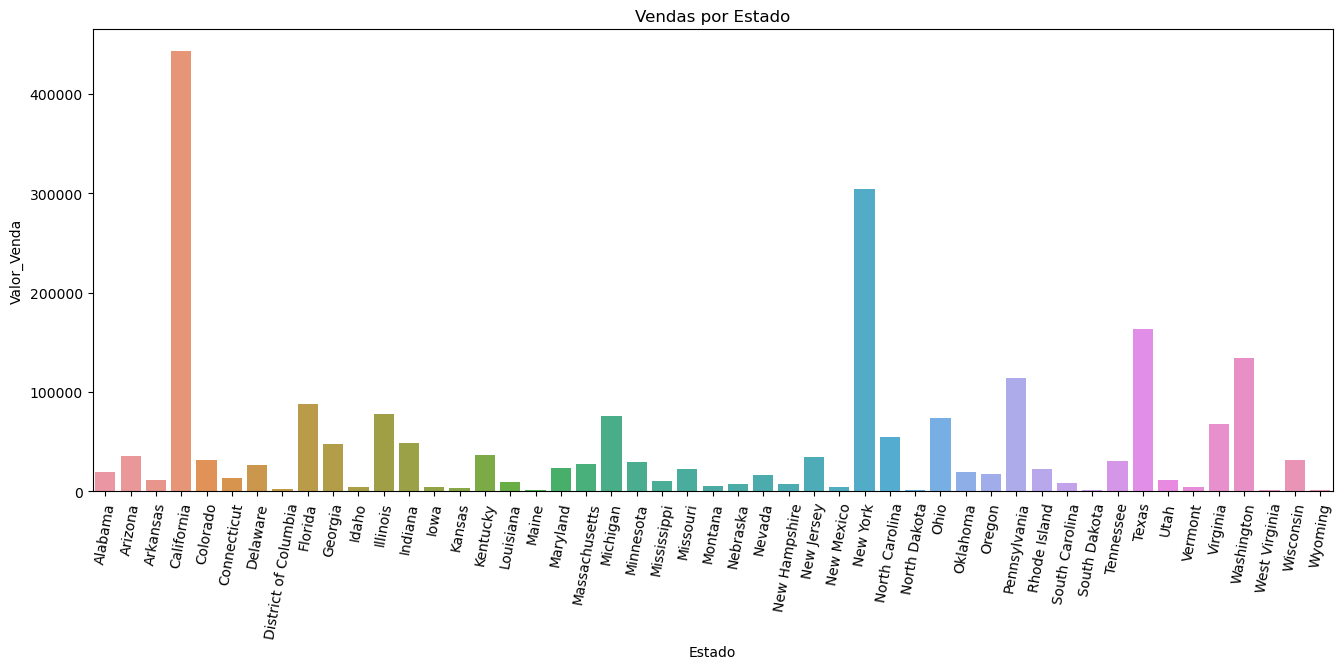

In [50]:
vendas_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(data=vendas_estado,
            y = 'Valor_Venda',
            x = 'Estado').set_title('Vendas por Estado')

plt.xticks(rotation=80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

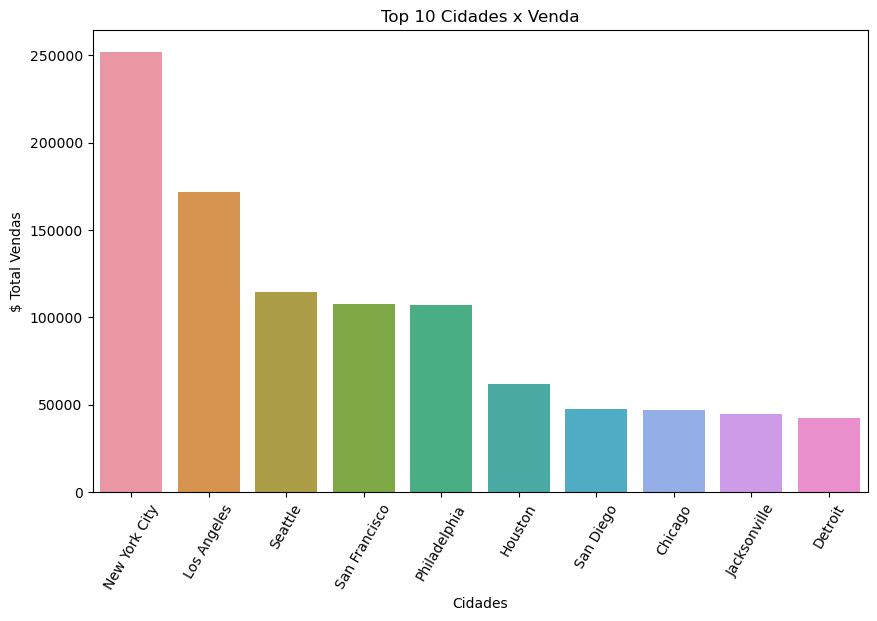

In [31]:
v10 = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).reset_index().head(10)
v10.head(10)
# Plotando o gráfico 
plt.figure(figsize=(10,6))
sns.set_palette('coolwarm')
sns.barplot(data=v10,
            x='Cidade',
            y='Valor_Venda').set_title('Top 10 Cidades x Venda')

plt.xlabel('Cidades')
plt.ylabel('$ Total Vendas')
plt.xticks(rotation=60)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [39]:
df_segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
df_segmento.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [40]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100))
        return ' $ {v:d}'.format(v=val)
    return my_format

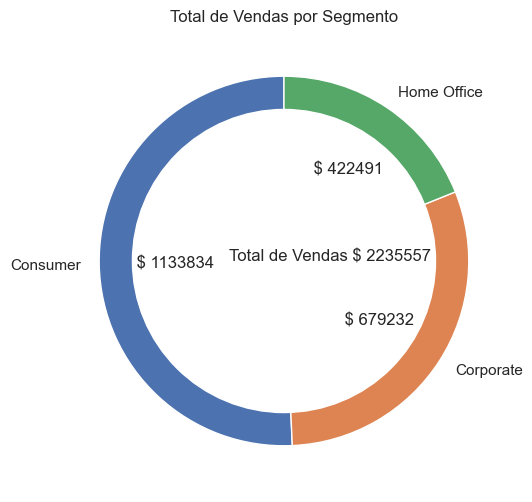

In [52]:
# plot
plt.figure(figsize=(16,6))

# Gráfico de pizza
plt.pie(df_segmento['Valor_Venda'],
        labels=df_segmento['Segmento'],
        autopct= autopct_format(df_segmento['Valor_Venda']),
        startangle=90)

# Limpa o círculo central
centre_circle = plt.Circle((0,0),0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Labels e anotações
plt.annotate(text= f'Total de Vendas $ {str(int(sum(df_segmento["Valor_Venda"])))}', xy=(-0.30,0))
plt.title('Total de Vendas por Segmento')

plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [75]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [55]:
df.groupby([pd.Grouper(key='Data_Pedido', freq='Y'), 'Segmento'])['Valor_Venda'].sum()

Data_Pedido  Segmento   
2015-12-31   Consumer       256719.9166
             Corporate      125819.5957
             Home Office     88229.0878
2016-12-31   Consumer       265295.2593
             Corporate      114643.1229
             Home Office     74134.1332
2017-12-31   Consumer       288459.5572
             Corporate      203266.7398
             Home Office    103639.6270
2018-12-31   Consumer       323359.6019
             Corporate      235502.7284
             Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [80]:
# Vendas 15% de desconto
df[df['Valor_Venda'] > 1000].shape[0]

457

In [59]:
# outra proposta

# Cria uma coluna classificando o descontp 
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1


In [64]:
# Total pr cada valor da variável
df['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [65]:
df_filtrado = df[df['Valor_Venda'] > 1000]
df_filtrado['Valor_Venda_Desc'] = df_filtrado['Valor_Venda'] * (1 - 0.15)

v1 = df_filtrado['Valor_Venda'].mean()
v2 = df_filtrado['Valor_Venda_Desc'].mean()

print(f'Média de valor de Vendas Antes {round(v1,2)}\nMédia de Valor de Vendas depois {round(v2,2)}')

Média de valor de Vendas Antes 2116.81
Média de Valor de Vendas depois 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [99]:
# Extraindo mês e ano 
df['Mes'] = df['Data_Pedido'].dt.month
df['Ano'] = df['Data_Pedido'].dt.year


In [100]:
# Agrupamento Ano, Mês e segmento
df_ag10 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [101]:
df_ag10

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [103]:
# Vamos extrair os níveis
anos = df_ag10.index.get_level_values(0)
meses = df_ag10.index.get_level_values(1)
segmentos = df_ag10.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

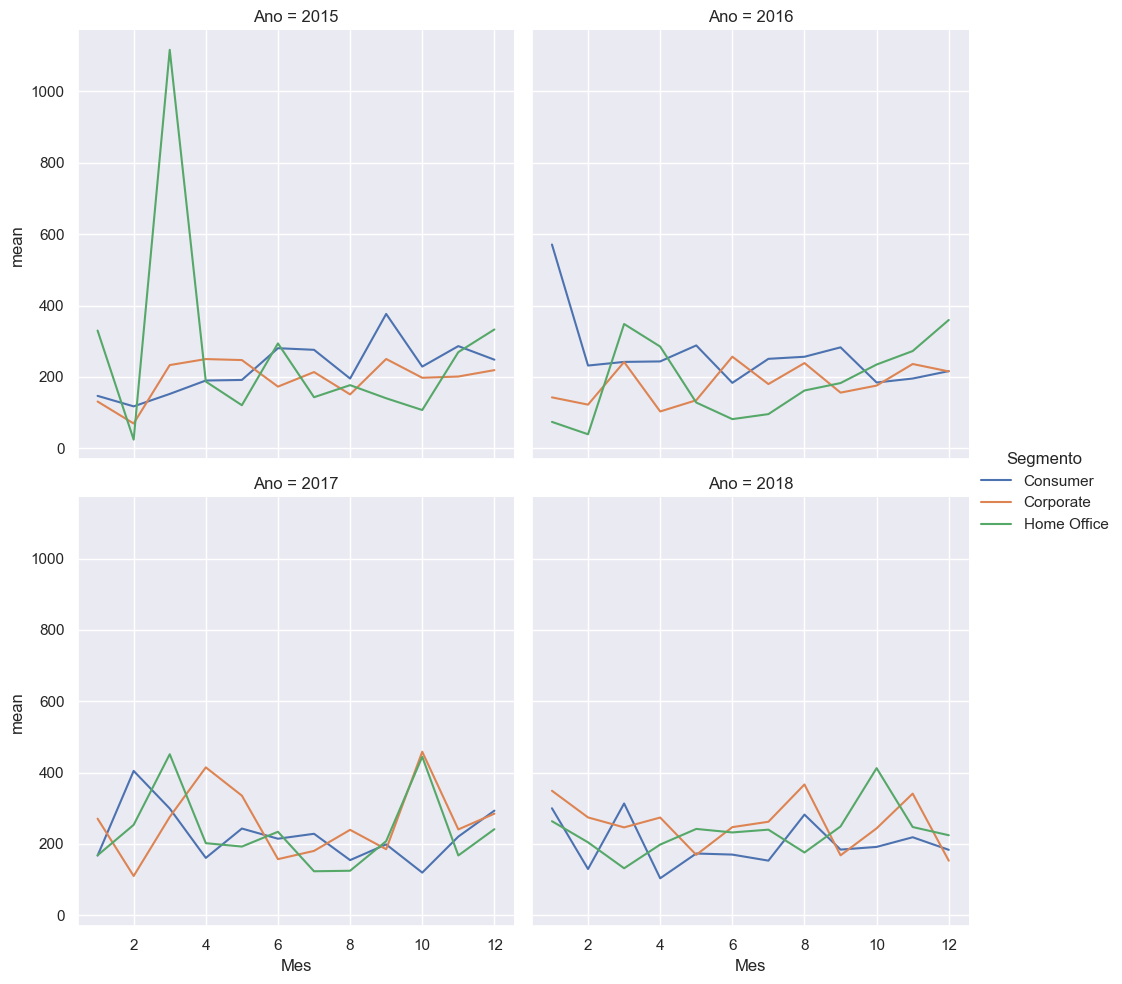

In [109]:
# Plot
plt.figure(figsize=(12,6))
sns.set()

fig1 = sns.relplot(kind = 'line',
                   data = df_ag10,
                   y='mean',
                   x=meses,
                   hue=segmentos,
                   col=anos,
                   col_wrap= 2
                   )

plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [66]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1


In [76]:
# Agrupando por categoria e subcategoria e calculamos a soma somente para variáveis
df_ag10 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only=True).sort_values(by='Valor_Venda', ascending=False).head(12)

df_ag10.head(50)

Valor_Venda  Desconto
Categoria       SubCategoria                       
Technology      Phones        325271.2940     90.15
Furniture       Chairs        317919.6250     63.30
Office Supplies Storage       216188.3620     84.75
Furniture       Tables        202083.3600     34.15
Office Supplies Binders       194723.3810    149.10
Technology      Machines      189238.6310     13.65
                Accessories   162791.3620     76.10
                Copiers       146248.0940      8.30
Furniture       Bookcases     108045.0467     23.50
Office Supplies Appliances    104061.6930     46.45
Furniture       Furnishings    88862.7700     92.75
Office Supplies Paper          76312.7640    132.90

In [77]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria 
df_ag10 = df_ag10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()

obs: Classificar o item acima por categoria  é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [78]:
df_ag10.head(50)

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [79]:
# Criamos outro dataframe somente com os totais por categoria 
df_totcat = df_ag10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [80]:
# Dataframe com Categorias
df_totcat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [81]:
# Lista de cores para categorias
cores_categorias  = [
    '#5d00de',
    '#0ee84f',
    '#e80e27'
]

In [82]:
# Lista de cores para subcategorias
cores_subcategorias = [
    '#aa8cd4',
    '#aa8cd5',
    '#aa8cd6',
    '#aa8cd7',
    '#26c957',
    '#26c958',
    '#26c959',
    '#26c960',
    '#e65e65',
    '#e65e66',
    '#e65e67',
    '#e65e68']

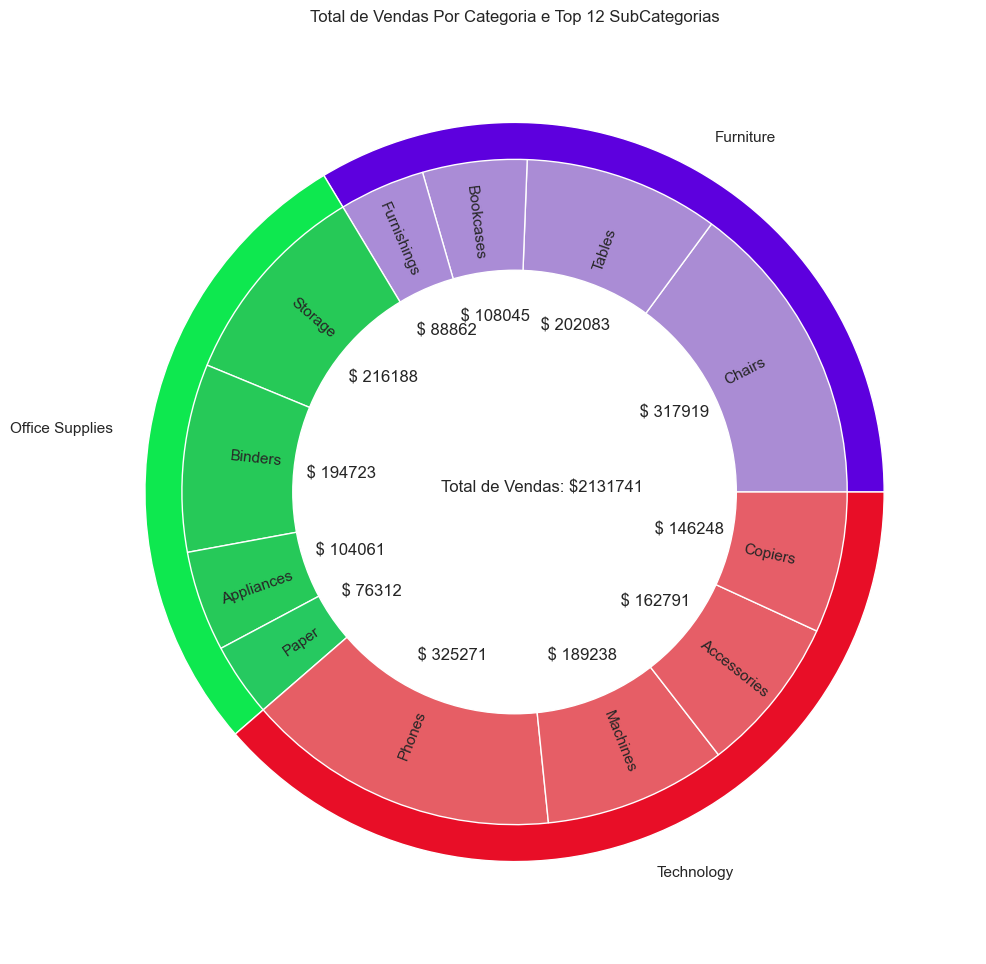

In [83]:
# Plot
# Tamanho da figura
fig, ax = plt.subplots(figsize=(18,12))

# Gráfico das categorias
p1 = ax.pie(df_totcat['Valor_Venda'],
            radius= 1,
            labels= df_totcat['Categoria'],
            wedgeprops= dict(edgecolor = 'white'),
            colors=cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_ag10['Valor_Venda'],
            radius = 0.9,
            labels=df_ag10['SubCategoria'],
            autopct= autopct_format(df_ag10['Valor_Venda']),
            colors=cores_subcategorias,
            labeldistance= 0.7,
            wedgeprops= dict(edgecolor = 'white'),
            pctdistance= 0.53,
            rotatelabels= True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0,0), 0.6, fc= 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text=f'Total de Vendas: ${str(int(sum(df_ag10["Valor_Venda"])))}', xy=(-0.2,0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim